In [1]:
%load_ext autoreload
%autoreload 2

In [60]:
import numpy as np
import pandas as pd

from thalamus_merfish_analysis import abc_load as abc
from thalamus_merfish_analysis import ccf_images as cimg
from thalamus_merfish_analysis import ccf_plots as cplots
get_ipython().run_line_magic('matplotlib', 'inline') 

## Load thalamus data

In [57]:
obs_wmb = abc.get_combined_metadata()
obs_th = abc.load_standard_thalamus(data_structure='obs')

In [4]:
# set spatial column names to `_reconstructed` coordinate space
coords = '_reconstructed'

x_col = 'x'+coords
y_col = 'y'+coords
section_col = z_col = 'z'+coords

In [5]:
# Load the CCF structures image
ccf_images = abc.get_ccf_labels_image()

In [6]:
# Precompute boundaries to use multiple times in this notebook w/o need to recompute

# we only need to load the boundaries for sections that contain the thalamus
sections_all = sorted(obs_th[section_col].unique())
sections_int = np.rint(np.array(sections_all)/0.2).astype(int)

# precompute boundaries for thalamic sections
ccf_boundaries = cimg.sectionwise_label_erosion(ccf_images, distance_px=1, 
                                                fill_val=0, return_edges=True, 
                                                section_list=sections_int
                                                )

In [7]:
# 3 example sections for paper figures
sections_3 = [6.4, 7.2, 8.0]

In [74]:
# if you reload thalamus_merfish_analysis.ccf_plots after this cell has been run, 
# cplots.CCF_REGIONS_DEFAULT will be reset to None & you'll need to re-run this cell
cplots.CCF_REGIONS_DEFAULT = abc.get_thalamus_names('substructure')

In [61]:
# We can load & use the published color palettes for the ABC Atlas taxonomy
abc_palettes = {level: abc.get_taxonomy_palette(level) for level in 
                ['neurotransmitter','class', 'subclass','supertype','cluster']}

# We have also provided a secondary color palette for the cluster level that 
# attempts to increase the color contrast between spatially negihboring clusters
palette_df = pd.read_csv('/code/resources/cluster_palette_glasbey.csv')
cluster_palette = dict(zip(palette_df['Unnamed: 0'], palette_df['0']))

In [79]:
obs_wmb

,brain_section_label,cluster_alias,average_correlation_score,x_section,y_section,z_section,neurotransmitter,class,subclass,supertype,...,y_reconstructed,z_reconstructed,parcellation_index,x_ccf,y_ccf,z_ccf,parcellation_division,parcellation_structure,parcellation_substructure,left_hemisphere
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,7.226245,4.148963,6.6,NaN,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,...,4.007680,6.6,1160,7.495417,2.445872,7.455066,HPF,DG,DG-po,False
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,5.064889,7.309543,4.2,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,...,7.264429,4.2,564,9.227966,6.133693,5.225024,P,TRN,TRN,True
1017092617101450577,C57BL6J-638850.25,4218,0.763531,5.792921,8.189973,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,...,8.007646,4.0,761,9.344912,6.989939,6.002664,P,P-unassigned,P-unassigned,False
1018093344101130233,C57BL6J-638850.13,4218,0.558073,3.195950,5.868655,2.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,...,5.719814,2.4,718,10.977068,4.398568,3.305223,cbf,arb,arb,True
1019171912201610094,C57BL6J-638850.27,4218,0.591009,5.635732,7.995842,4.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,...,7.847877,4.4,761,8.997138,6.798329,5.827197,P,P-unassigned,P-unassigned,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,1.560003,4.669243,8.8,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,...,4.293542,8.8,828,5.321669,2.575568,1.694437,Isocortex,SSp-n,SSp-n2/3,True
1017165415100930567,C57BL6J-638850.57,5254,0.620546,5.032556,3.695696,11.0,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,...,3.780218,11.0,1004,3.493405,2.016746,5.317544,Isocortex,ACAd,ACAd5,True
1017155956102610748,C57BL6J-638850.49,5254,0.548053,2.549142,4.231188,9.2,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,...,4.251416,9.2,1091,4.994629,2.542668,2.773582,Isocortex,SSp-m,SSp-m6a,True


## Figure 1: Thalamic cell types vs anatomical annotations

/root/capsule/code/thalamus_merfish_analysis/ccf_plots.py:893: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obs = pd.concat(


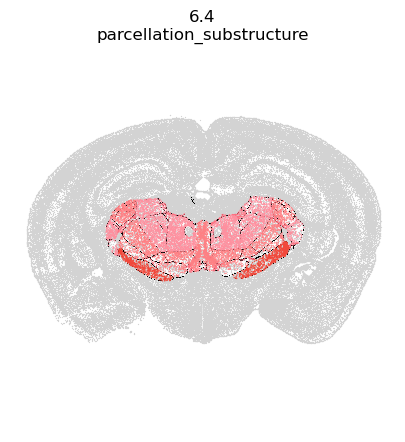

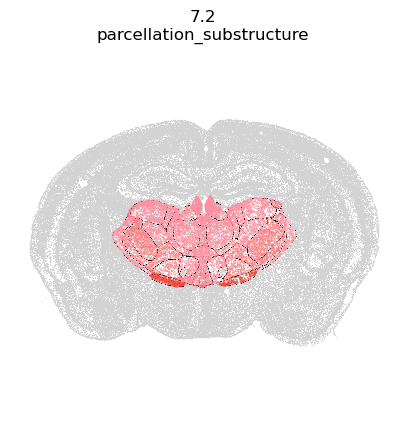

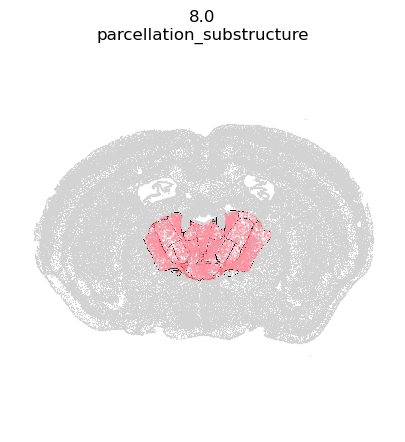

In [86]:
kwargs_celltypes = dict(boundary_img=ccf_boundaries,
                        bg_cells=obs_wmb, # background cells are displayed in grey
                        section_col=section_col,
                        x_col=x_col, 
                        y_col=y_col,
                        edge_color='black',
                        point_size=1, # cell marker size
                       )

taxonomy_level = 'class'
class_figs= cplots.plot_ccf_overlay(
    obs_th, 
    ccf_images, 
    point_hue='parcellation_substructure',
    sections=sections_3,
    separate_figs=True, # False does NOT show bg_cells
    point_palette=ccf_palette,#abc_palettes[taxonomy_level],
    legend=None, #'cells',
    figsize=(20, 5),
    custom_xy_lims=[0, 11, 11, 0],
    **kwargs_celltypes
)

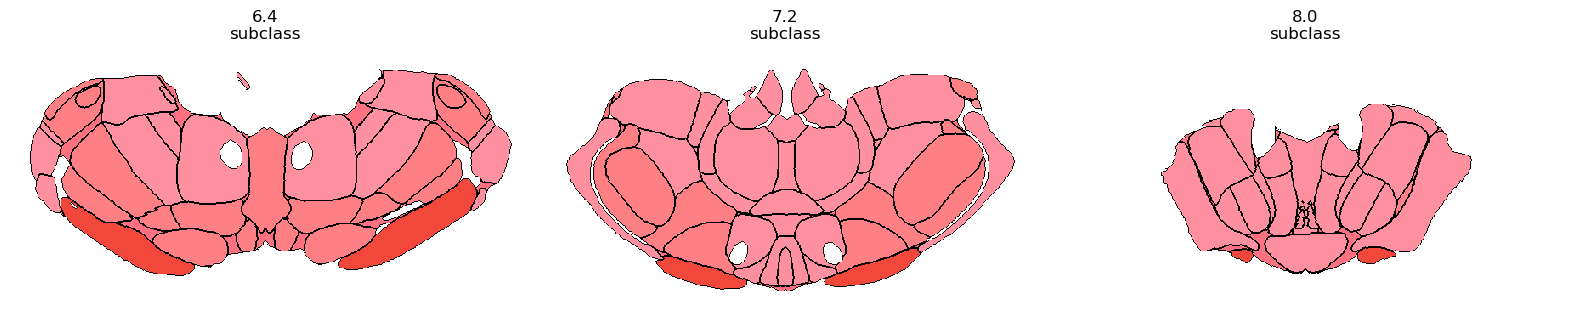

In [56]:
kwargs = dict(
    bg_cells=None,
    section_col=section_col,
    x_col=x_col,
    y_col=y_col,
    point_size=0,
    edge_color="black",
    boundary_img=ccf_boundaries,
    # custom_xy_lims=[2.5, 6, 7, 4],
)

figs = cplots.plot_ccf_overlay(
    obs_th,
    ccf_images,
    point_hue="subclass",
    face_palette=ccf_palette, 
    min_group_count=0,
    sections=sections_3,
    separate_figs=False,
    figsize=(20, 5),
    legend=None,
    **kwargs,
)
# fig.savefig(f'../results/spaGCN_domains_ccf_overlay_3sections_res{res_str}.pdf', 
#             transparent=True, bbox_inches='tight')

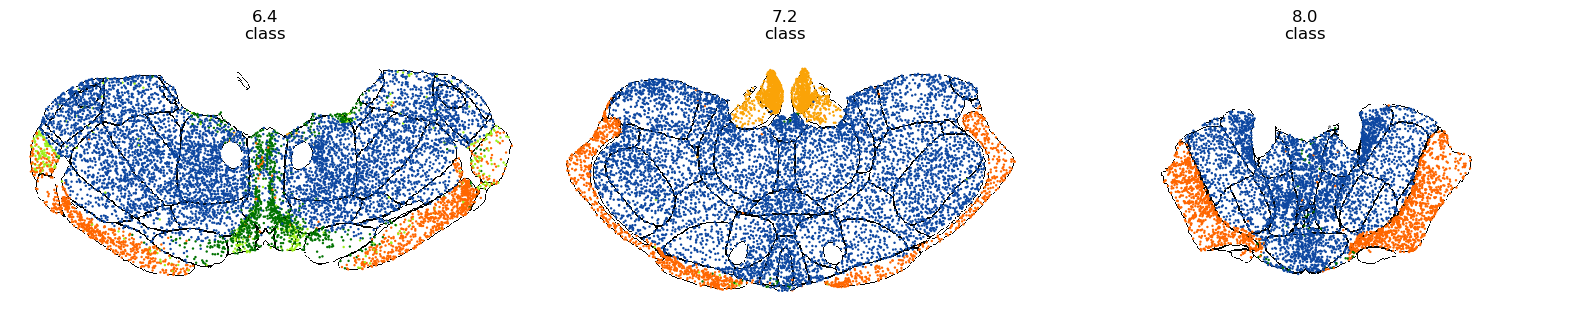

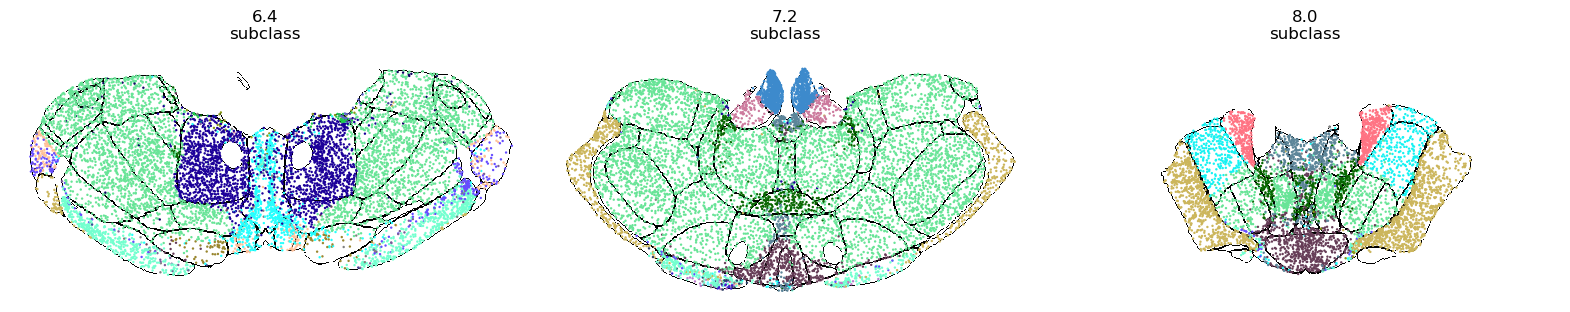

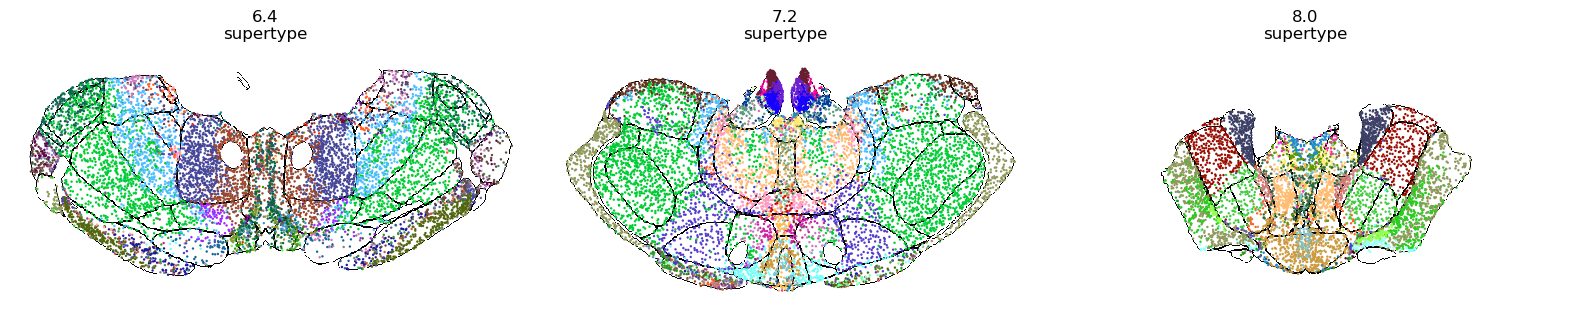

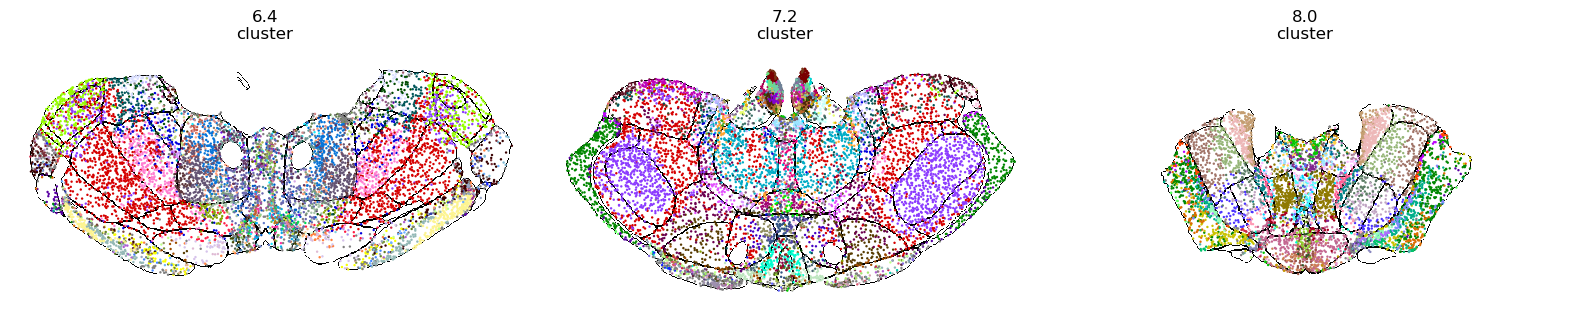

In [77]:
kwargs_celltypes = dict(boundary_img=ccf_boundaries,
                        bg_cells=None,#obs_wmb, # background cells are displayed in grey
                        section_col=section_col,
                        x_col=x_col, 
                        y_col=y_col,
                        edge_color='black',
                        point_size=3, # cell marker size
                       )

levels = ['class', 'subclass', 'supertype', 'cluster']

for taxonomy_level in levels:
    if taxonomy_level == 'cluster':
        palette = cluster_palette
    else:
        palette = abc_palettes[taxonomy_level]
        
    nt_figs = cplots.plot_ccf_overlay(
        obs_th, 
        ccf_images, 
        point_hue=taxonomy_level, 
        sections=sections_3,
        separate_figs=False,
        point_palette=palette,
        legend=None, #'cells',
        figsize=(20, 5),
        **kwargs_celltypes
    )

## Figure 2: Thalamic nuclei metrics